<a href="https://www.kaggle.com/code/utkarshx27/digit-recognizer?scriptVersionId=133978625" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
sample_submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [4]:
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape, test.shape

((42000, 785), (28000, 784))

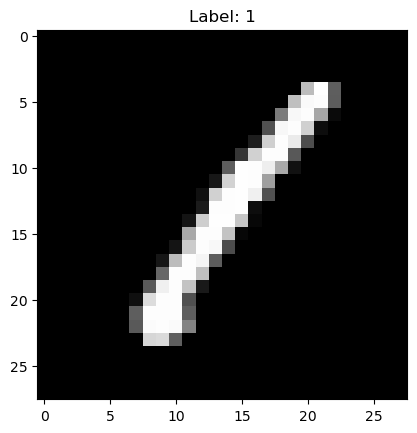

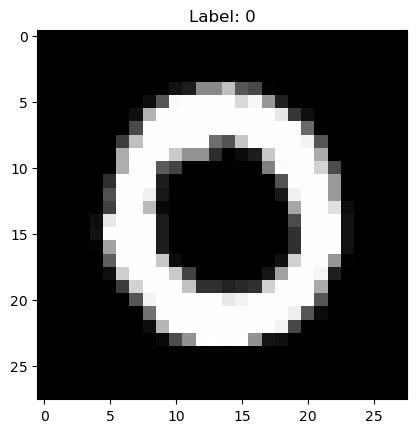

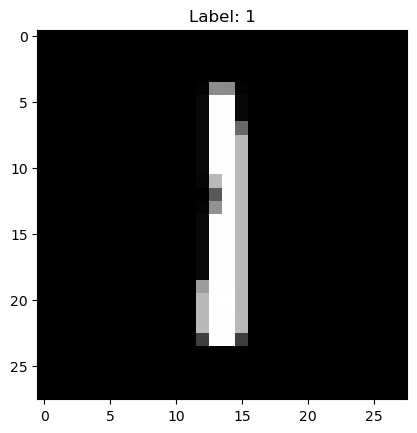

In [6]:
train_images = train.drop('label', axis=1).values.reshape(-1, 28, 28)

for i in range(3):
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train['label'].iloc[i]}")
    plt.show()

In [7]:
X=train.drop('label', axis  =1 )
y=train['label']

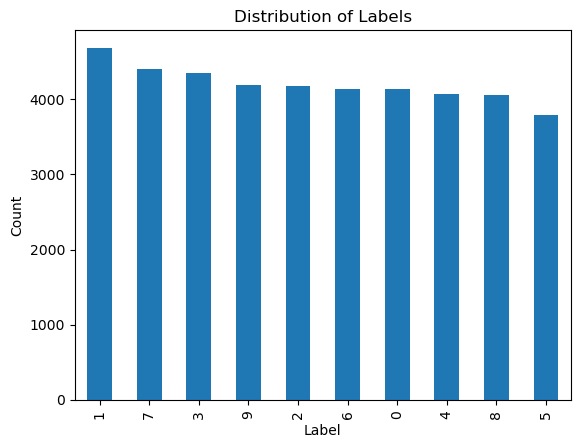

In [8]:
value_counts = y.value_counts()
value_counts.plot(kind='bar')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [10]:
X_train = X_train.values.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.values.reshape(-1, 28, 28, 1) / 255.0
X_train.shape, X_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1))

In [11]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)

In [12]:


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
optimizer = Adam(learning_rate=0.001, epsilon=1e-08, decay=0.0)

In [15]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [16]:
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [17]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1050/1050 [==============================] - 93s 87ms/step - loss: 0.2152 - accuracy: 0.9311 - val_loss: 0.0594 - val_accuracy: 0.9830
Epoch 2/10
1050/1050 [==============================] - 92s 87ms/step - loss: 0.0755 - accuracy: 0.9781 - val_loss: 0.0450 - val_accuracy: 0.9855
Epoch 3/10
1050/1050 [==============================] - 91s 87ms/step - loss: 0.0539 - accuracy: 0.9839 - val_loss: 0.0376 - val_accuracy: 0.9887
Epoch 4/10
1050/1050 [==============================] - 91s 87ms/step - loss: 0.0475 - accuracy: 0.9864 - val_loss: 0.0324 - val_accuracy: 0.9904
Epoch 5/10
1050/1050 [==============================] - 91s 87ms/step - loss: 0.0410 - accuracy: 0.9879 - val_loss: 0.0336 - val_accuracy: 0.9886
Epoch 6/10
1050/1050 [==============================] - 91s 87ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0258 - val_accuracy: 0.9924
Epoch 7/10
1050/1050 [==============================] - 92s 87ms/step - loss: 0.0314 - accuracy: 0.9905 - val_loss: 0.0209 -

In [18]:
X_test = test.values.reshape(-1, 28, 28, 1) / 255.0
test_predictions = model.predict(X_test)

875/875 [==============================] - 19s 21ms/step


In [19]:
test_preds = []
for i in range(len(test_predictions)):
    test_preds.append(np.argmax(test_predictions[i]))

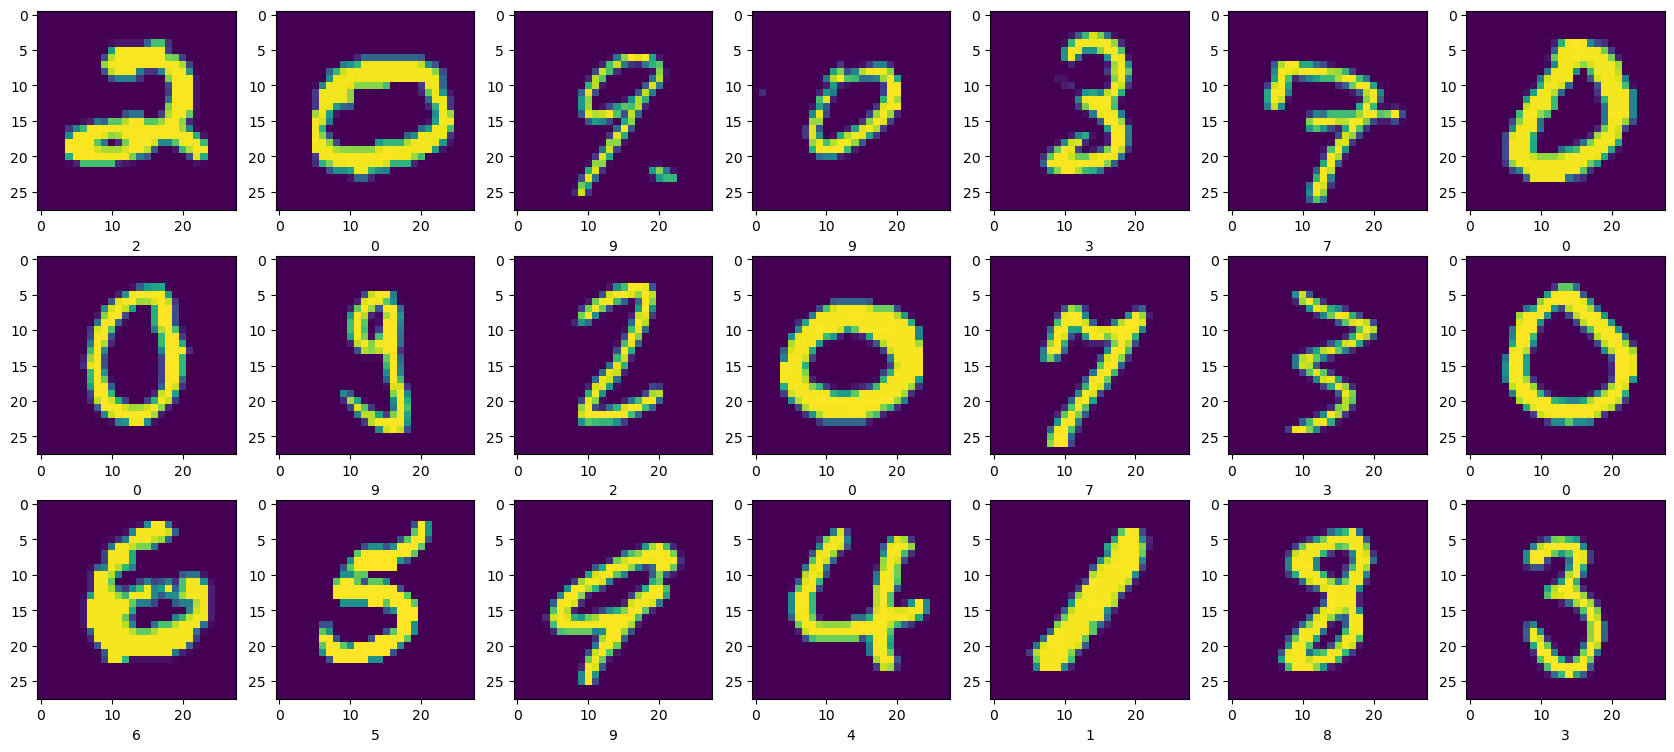

In [20]:
f,ax = plt.subplots(3, 7, figsize=(21,9))
for i in range(7):
    ax[0][i].imshow(X_test[i])
    ax[0][i].set_xlabel(test_preds[i])
    ax[1][i].imshow(X_test[i+100])
    ax[1][i].set_xlabel(test_preds[i+100])
    ax[2][i].imshow(X_test[i+500])
    ax[2][i].set_xlabel(test_preds[i+500])
    
plt.show()

In [21]:
sample_submission.Label = test_preds
sample_submission.to_csv('submission.csv', index=False)